<a href="https://colab.research.google.com/github/Baldezo313/Some-real-world-machine-learning-project/blob/main/PROJET_1_PREDICTION_DU_PRIX_D%E2%80%99UNE_VOITURE_EN_FONCTION_DE_SES_CARACTERISTIQUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET 1 : PREDICTION DU PRIX D’UNE VOITURE EN FONCTION DE SES CARACTERISTIQUES  

## INTRODUCTION  

Une voiture doit être vendue à un prix raisonnable aussi bien pour les potentiels acheteurs mais
aussi pour le vendeur. Comment déterminer alors le meilleur ou le juste prix d'une voiture ?  
Quelles sont les caractéristiques d'une voiture qui affectent son prix.  

Ce projet nous permettra de découvrir un type d’apprentissage automatique supervisé : La
régression. Dans les tâches de régression, la variable cible est une variable continue. Par
exemple, si on veut prédire le prix d’une maison, le bénéfice d’une entreprise, le PIB (Produit
Intérieur Brut) d’un pays, le nombre de vélos loués à une heure donnée, ..., on utilisera des
algorithmes de régression étant donné que ces variables sont quantitatives.  

L'objectif ici est de construire un modèle de régression linéaire qui prédit le prix de vente d'une
voiture en fonction de ses caractéristiques.  



* **LIBRAIRIES**

In [2]:
#Importation des librairies nécessaires à la réalisation du projet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**DONNEES**  
Pour répondre à notre problématique, nous disposons d'un fichier csv de données de plusieurs
voitures avec leurs caractéristiques et leurs prix.

In [3]:
filename = "https://raw.githubusercontent.com/Baldezo313/Some-real-world-machine-learning-project/refs/heads/main/Machine-Learning-par-la-pratique-avec-Python-master/imports-85.data?token=GHSAT0AAAAAAC4VKTERAKVOWZH2QKHGJ6QGZ4FFPUA"

#Lecture du fichier
df = pd.read_csv(filename, header = None)
#Cinq premières lignes
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Les noms des colonnes ne sont pas définis dans ce jeu de données. Heureusement que nous
avons retrouvé ces noms de colonnes dans un autre fichier dans le même dépôt que les données.

In [4]:
headers = ["symboling","normalized-losses","make","fueltype","aspiration", "num-of-doors","body-style","drive-wheels","engine-location","wheelbase",
"length","width","height","curb-weight","engine-type","num-of-cylinders", "engine-size","fuelsystem","bore","stroke","compression-ratio","horsepower",
"peak-rpm","city-mpg","highway-mpg","price"]

#Relecture des données
df = pd.read_csv(filename, header = None, names = headers)
df.head()

,symboling,normalized-losses,make,fueltype,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheelbase,...,engine-size,fuelsystem,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Les valeurs manquantes sont ici représentées par des "?". Ceci est courant dans les données
qu'on retrouve sur Internet.

In [5]:
# Structure de la dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fueltype           205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheelbase          205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Il est très important de comprendre le sens de chaque variable dans un jeu de données. vous trouverez [ici](https://archive.ics.uci.edu/dataset/10/automobile) la description des variables.

### NETTOYAGE DES DONNEES  

* **GESTION DES VALEURS MANQUANTES**  
Il y a des valeurs manquantes représentées par des *"?"* dans les données. Comment gérer ces
données manquantes ?

In [6]:
#Remplacement de "?" par NaN
df.replace("?", np.nan, inplace = True)

#Evaluation du nombre de valeurs manquantes par colonne
df.isnull().sum()

,0
symboling,0
normalized-losses,41
make,0
fueltype,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheelbase,0


D'après la description du jeu de données, les variables **normalized-losses**, **bore**, **stroke**,
**horsepower** et **peak-rpm** sont des variables continues. Nous remplacerons donc les valeurs
manquantes de chacune de ces colonnes par la moyenne de la colonne. La variable **num-ofdoors** est une variable catégorielle donc nous allons remplacer ses deux valeurs manquantes par le mode de la colonne.

La variable **price** est notre variable cible donc nous allons tout simplement supprimer les valeurs manquantes de cette colonne !

In [7]:
#Imputation par la moyenne des colonnes normalizedlosses, bore, stroke, horsepower et peak-rpm

def impute_avg(x):
  avg = x.astype('float').mean(axis=0)
  return x.replace(np.nan, avg, inplace = True)

for colonne in ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"]:
  impute_avg(df[colonne])

#Imputation par le mode de la colonne num-of-doors
mode = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan, mode, inplace = True)


#Suppression des lignes de df où il y a des données manquantes dans la variable price
df.dropna(subset = ['price'], axis = 0, inplace = True)

<ipython-input-7-792a69f9aaa9>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].replace(np.nan, mode, inplace = True)


Après avoir supprimé des lignes dans une dataframe, il faut toujours réinitialiser les indices.

In [8]:
#Réinitialisation des indices
df.reset_index(drop = True, inplace = True)

Vérifions que les diverses imputations effectuées aient bien fonctionnées.

In [9]:
#Nombre de valeurs manquantes dans df
df.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fueltype,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheelbase,0


Ce résultat confirme qu'il n'y a plus de données manquantes dans notre dataframe.

* **FORMAT CORRECT DES DONNEES**

In [10]:
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fueltype,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheelbase,float64


On remarque que certaines variables ne sont pas stockées dans le bon format. Par exemple, il y
a des variables de type numérique comme bore et stroke qui sont stockées dans le format 'object'
(format des chaînes de caractères). En se basant sur la description 8 des données, nous allons
convertir les types de données dans le format approprié pour chaque colonne.

In [13]:
#Conversion
df[['bore', 'stroke', 'peak-rpm','price']] = df[['bore', 'stroke', 'peak-rpm','price']].astype("float")

df[['normalized-losses', 'horsepower']] = df[['normalized-losses','horsepower']].astype("int")

df.dtypes

,0
symboling,int64
normalized-losses,int64
make,object
fueltype,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheelbase,float64


**SAUVEGARDE DES DONNEES NETTOYEES**  

Avant de passer à l'analyse exploratoire des données, nous sauvegardons le fichier de données
issu de cette étape de nettoyage.

In [14]:
df.to_csv('df_clean.csv')

### ANALYSE EXPLORATOIRE DES DONNEES  

Le but de cette partie est de mieux comprendre les données en tirant des informations à partir
de ces données. Principalement, nous voulons déterminer les variables qui influencent le prix
d'une voiture.

* **CORRELATION**  

Nous voulons mesurer la force des relations linéaires entre variables. Pour ce faire, nous
calculerons le coefficient de corrélation de Pearson et nous afficherons les résultats.

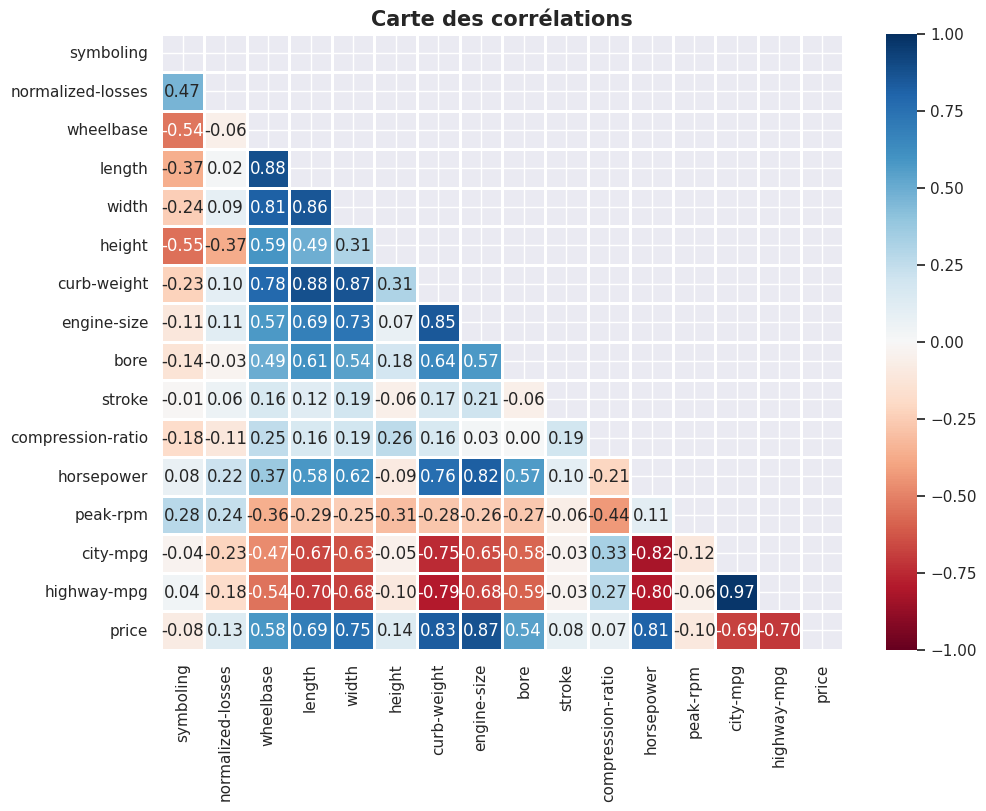

In [17]:
# Carte des corrélations
sns.set(rc={'figure.figsize':(11,8)})
numeric_df = df.select_dtypes(include=np.number)
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))

sns.heatmap(numeric_df.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)

plt.title('Carte des corrélations', fontsize=15, fontweight="bold")
plt.show()

En examinant les coefficients de corrélation, nous détectons les potentiels prédicteurs du prix
d'une voiture. Pour chaque variable numérique potentiellement prédicteur du prix, nous ferons
une régression linéaire simple entre elle et la variable **price**, afficher le coefficient de corrélation
de Pearson et ainsi que sa p-valeur.    

Le but de la régression linéaire est d’ajuster une droite aux données. Une droite, en 2 dimensions, est représentée par l’équation : $𝑦 = 𝑎𝑥 + 𝑏$. y est la variable dépendante (encore appelée variable d’intérêt ou variable cible) et x est la variable indépendante (encore appelée
prédicteur). a et b sont les paramètres du modèle (a est la pente de la droite d’ajustement et b est l’ordonnée à l’origine) que nous voulons apprendre.  

Commençons d'abord par définir une fonction qui automatise cette tâche afin de ne pas copiercoller
du code.



In [18]:
#Définition d'une fonction slrViz_corr
def slrViz_corr(var):
  sns.regplot(x = var, y = df['price'])
  plt.ylim(0,)
  Pearson_coef, P_value = stats.pearsonr(var, df['price'])
  return print('Le coefficient de corrélation de Pearson est ', Pearson_coef, 'avec une P-valeur de', P_value)

*wheel-base VS price*  
La variable wheel-base représente la distance entre les essieux 9 avant et arrière d'un véhicule.

Le coefficient de corrélation de Pearson est  0.584641822265508 avec une P-valeur de 8.076488270732885e-20


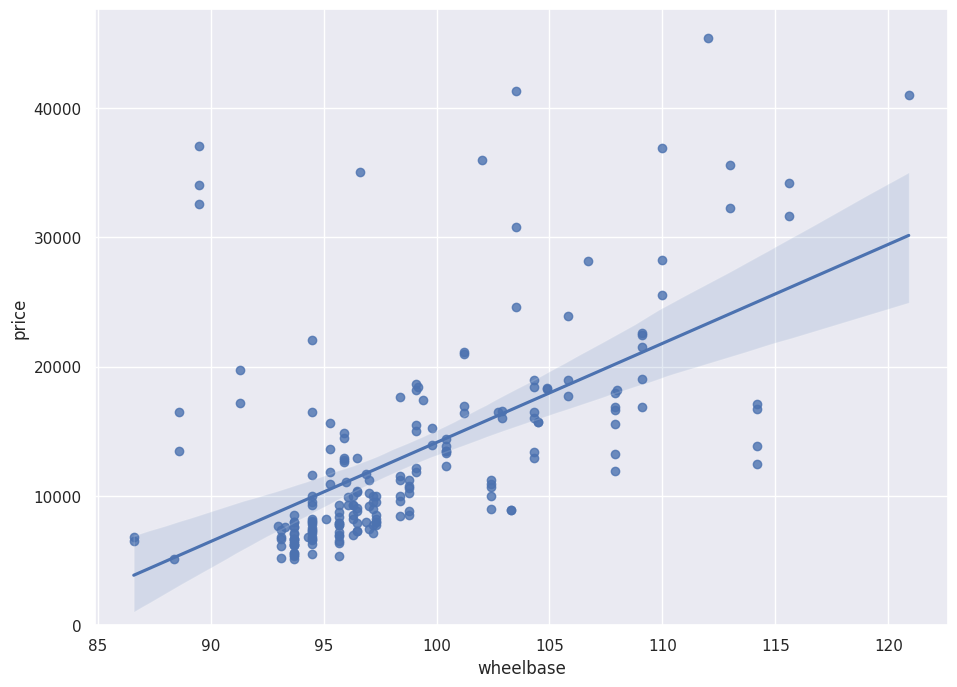

In [21]:
#Régression linéaire simple de 'price' en fonction de 'wheelbase'
slrViz_corr(df['wheelbase'])

La corrélation entre les variables **wheel-base** et **price** est statistiquement significative (p-value inférieure à 0,001) bien que la relation linéaire ne soit pas très forte.

*length VS price*  

Le coefficient de corrélation de Pearson est  0.6906283804483639 avec une P-valeur de 8.01647746615924e-30


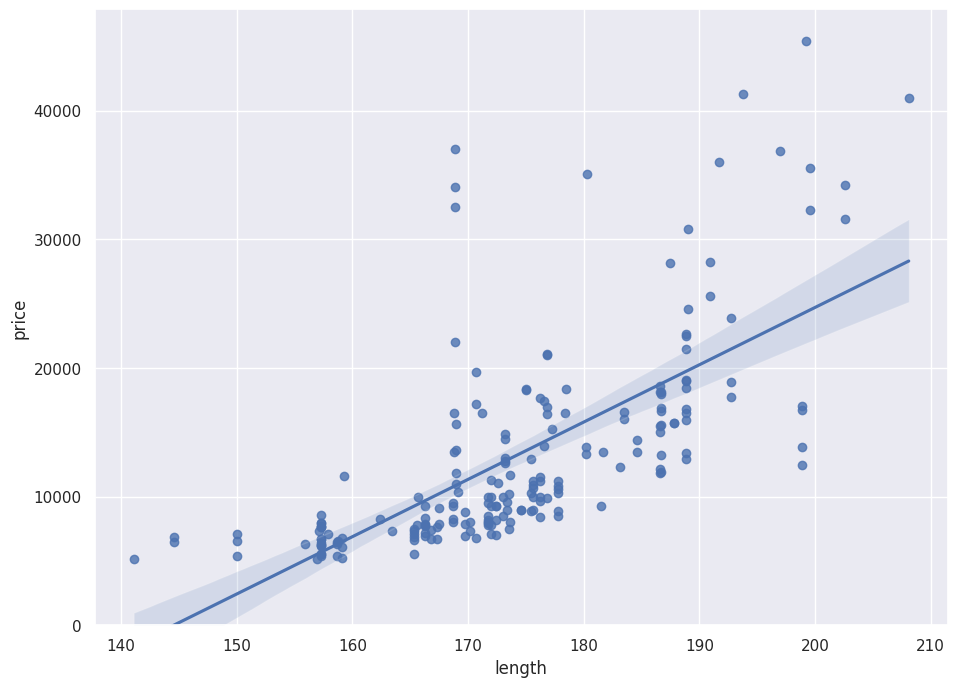

In [22]:
slrViz_corr(df['length'])

Il y a une forte corrélation positive et statistiquement significative (p-value inférieure à 0,001)
entre les variables **length** et **price**.

*width VS price*

Le coefficient de corrélation de Pearson est  0.7512653440522674 avec une P-valeur de 9.20033551048144e-38


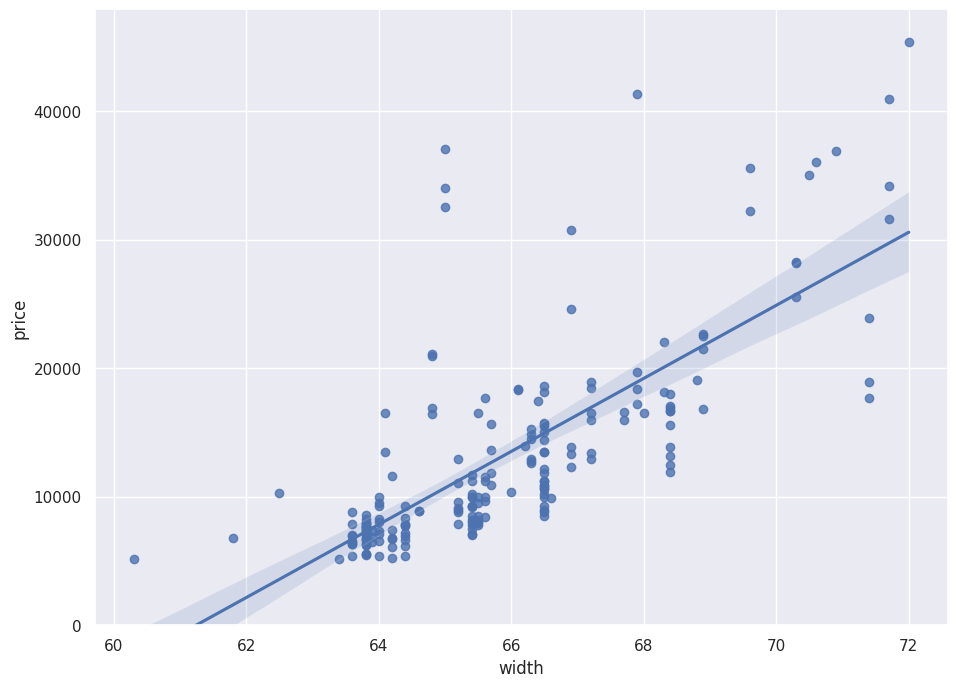

In [23]:
#Régression linéaire simple de 'price' en fonction de 'length'
slrViz_corr(df['width'])

Il y a une très forte corrélation positive et statistiquement significative (p-value inférieure à
0,001) entre les variables width et price.

*curb-weight VS price*  
La variable curb-weight représente le poids à vide d'une voiture c'est-à-dire son poids sans
occupants ni bagages.


Le coefficient de corrélation de Pearson est  0.8344145257702843 avec une P-valeur de 2.189577238893965e-53


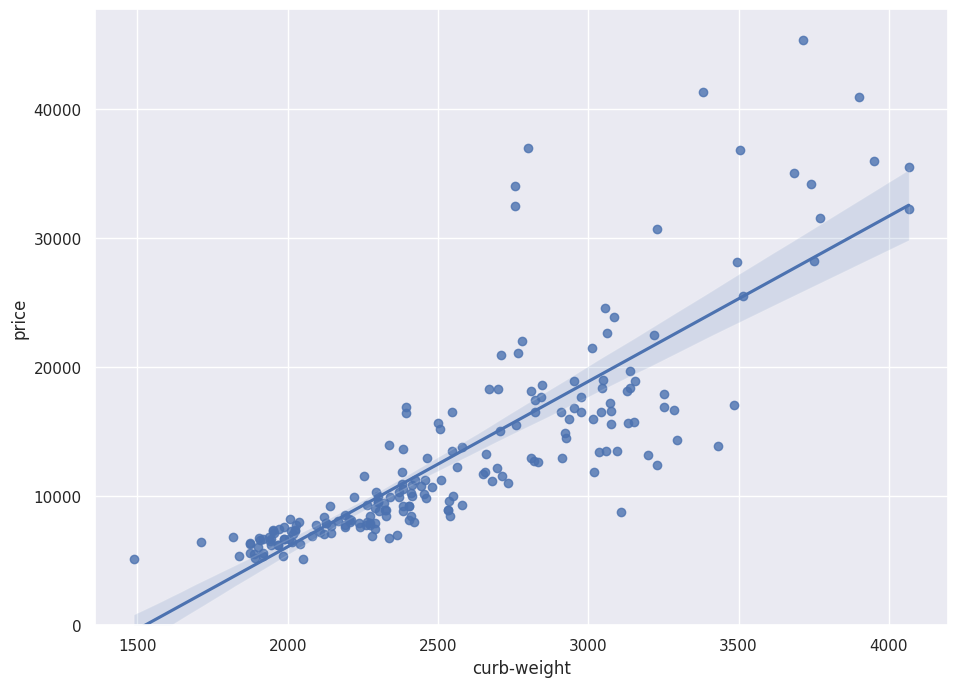

In [24]:
#Régression linéaire simple de 'price' en fonction de 'curbweight'
slrViz_corr(df['curb-weight'])

Il y a une corrélation positive extrêmement forte et statistiquement significative (p-value
inférieure à 0,001) entre les variables curb-weight et price.

*engine-size VS price*  
La variable engine-size représente la taille du moteur.

Le coefficient de corrélation de Pearson est  0.8723351674455185 avec une P-valeur de 9.265491622198793e-64


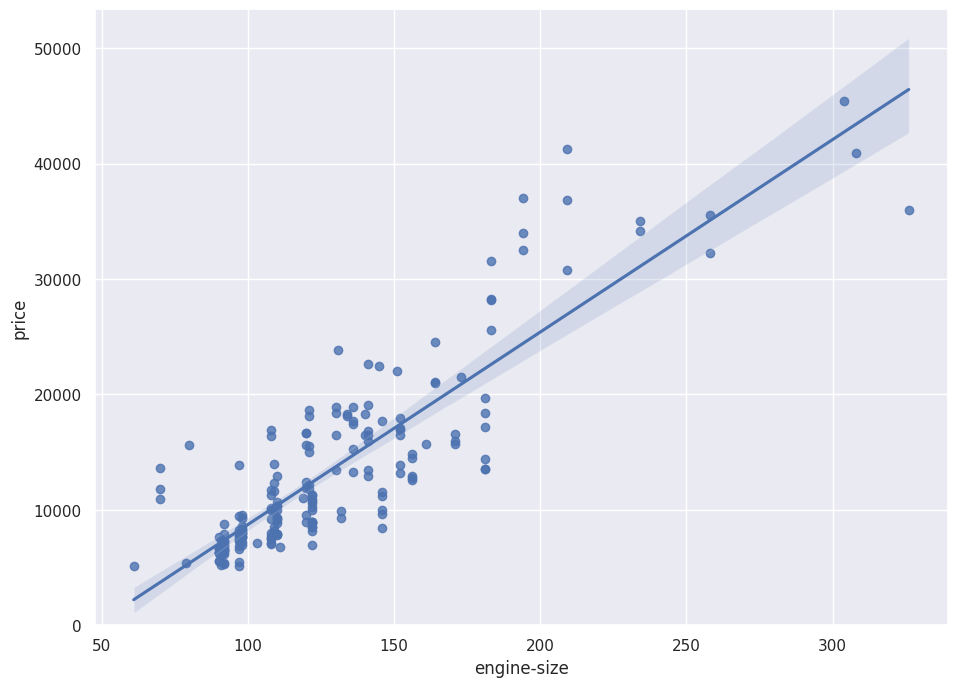

In [25]:
#Régression linéaire simple de 'price' en fonction de 'enginesize'
slrViz_corr(df['engine-size'])

Il y a une corrélation positive extrêmement forte et statistiquement significative (p-value
inférieure à 0,001) entre les variables engine-size et price.

*bore VS price*  
La variable bore représente le diamètre du cylindre de la jante.

Le coefficient de corrélation de Pearson est  0.5431553832626602 avec une P-valeur de 8.049189483935315e-17


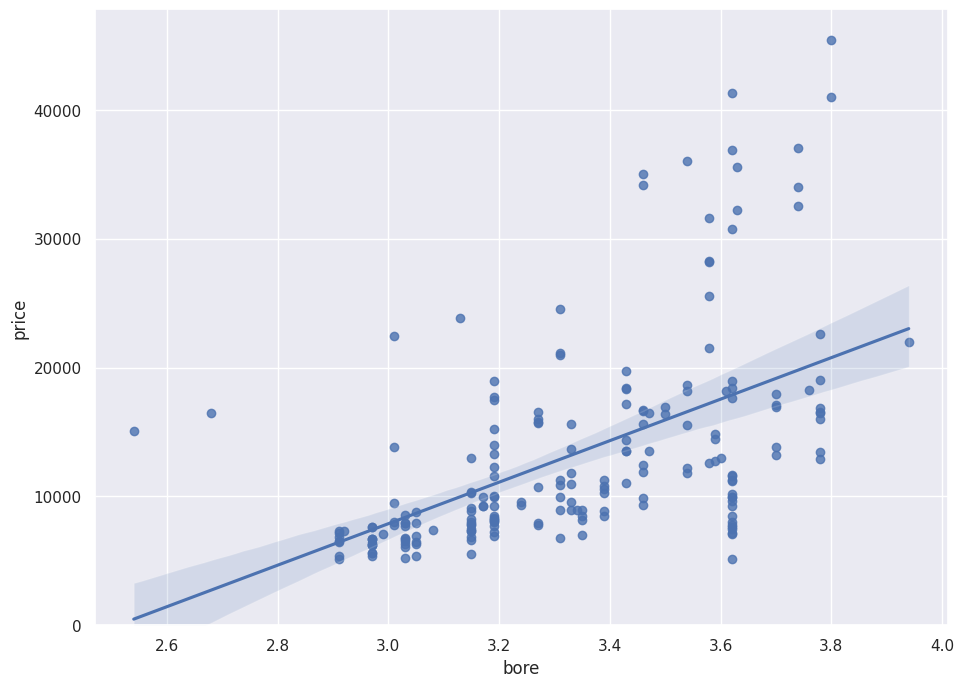

In [26]:
#Régression linéaire simple de 'price' en fonction de 'bore'
slrViz_corr(df['bore'])

La corrélation entre les variables bore et price est statistiquement significative (p-value inférieure à 0,001) bien que la relation linéaire ne soit pas très forte.

*horsepower VS price*  
horsepower représente la puissance du moteur (une unité de puissance est égale à 745,7 watts).

Le coefficient de corrélation de Pearson est  0.8096068016571054 avec une P-valeur de 6.273536270650351e-48


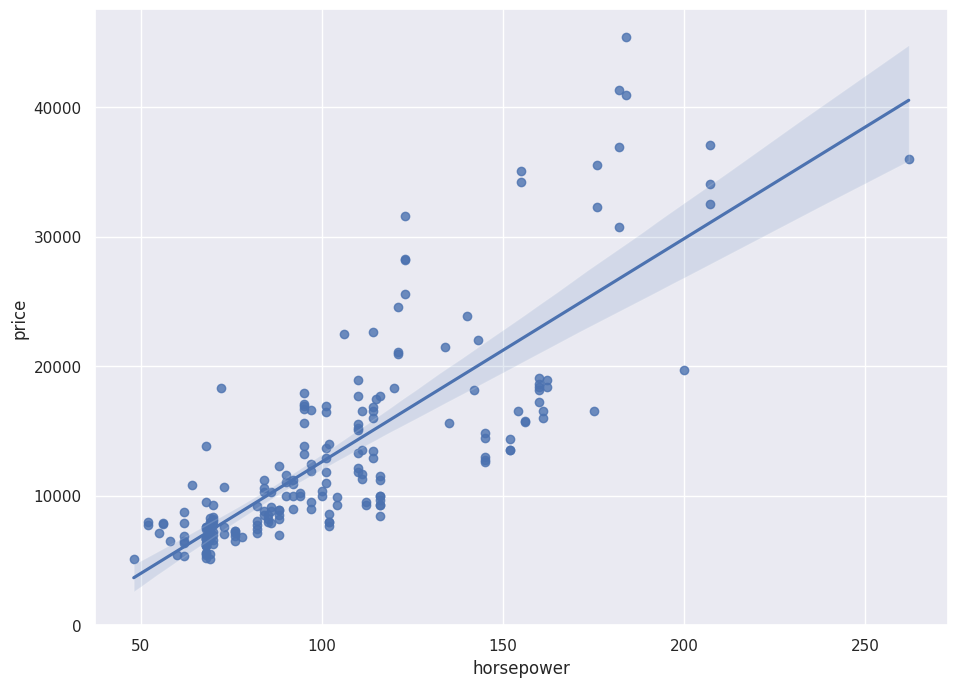

In [27]:
#Régression linéaire simple de 'price' en fonction de 'horsepower'
slrViz_corr(df['horsepower'])

Il y a une très forte corrélation positive et statistiquement significative (p-value inférieure à
0,001) entre la puissance du moteur et le prix de la voiture. Autrement dit, plus le moteur est
puissant, plus le prix de la voiture est élevé.  

*city-mpg VS price*  
La variable city-mpg représente la consommation en carburant de la voiture en agglomération.
Elle est donnée en miles par gallon. Pour trouver la consommation en Litres/100 Km, il faut diviser 235 par la consommation en miles/gallon).

Le coefficient de corrélation de Pearson est  -0.6865710067844678 avec une P-valeur de 2.3211320655675098e-29


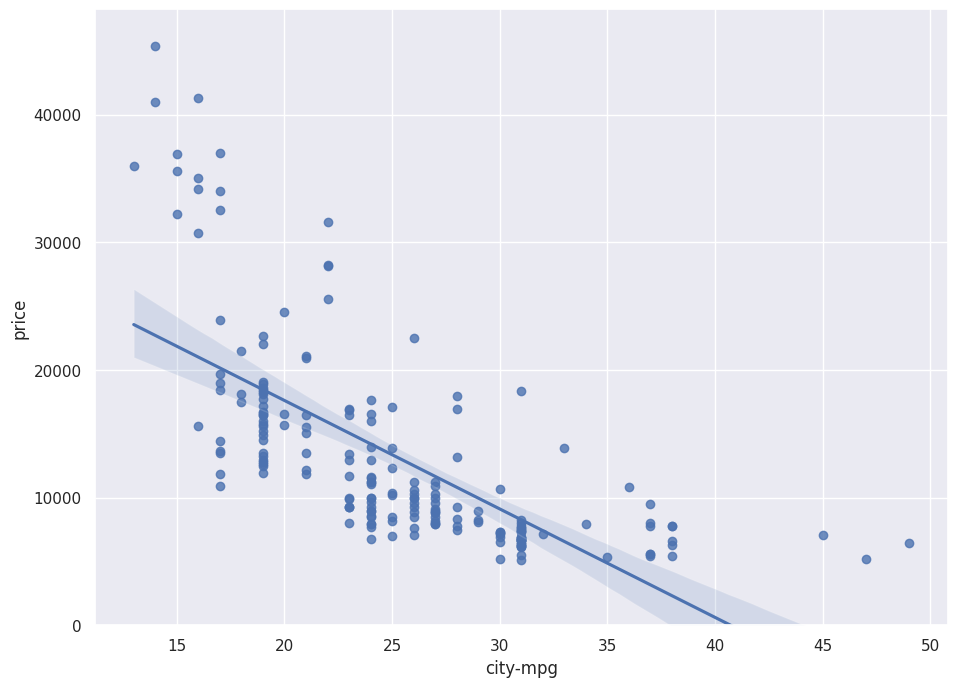

In [28]:
#Régression linéaire simple de 'price' en fonction de 'citympg'
slrViz_corr(df['city-mpg'])

Il y a une forte corrélation négative et statistiquement significative (p-value inférieure à 0,001)
entre les variables city-mpg et price. Autrement dit, plus la consommation en carburant (en
ville) de la voiture est importante, plus sa valeur (prix) baisse.

*highway-mpg VS price*  
La variable highway-mpg représente la consommation en carburant de la voiture sur l'autoroute.

Le coefficient de corrélation de Pearson est  -0.704692265058953 avec une P-valeur de 1.749547114447557e-31


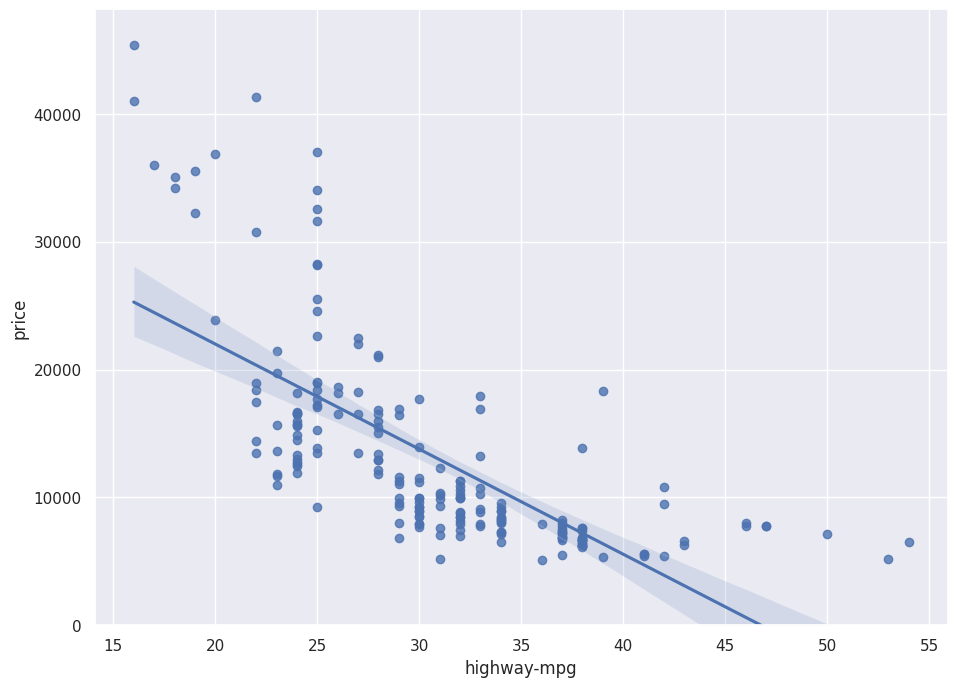

In [29]:
#Régression linéaire simple de 'price' en fonction de 'highway-mpg'
slrViz_corr(df['highway-mpg'])

Il y a une très forte corrélation négative et statistiquement significative (p-value inférieure à
0,001) entre les variables highway-mpg et price. Autrement dit, plus la consommation en
carburant (sur l'autoroute) de la voiture est importante, plus son prix baisse.  

A travers les analyses ci-dessus, nous avons déterminé les variables numériques qui influencent
le prix d'une voiture. Qu'en est-il de la relation entre chacune des valeurs catégorielles et la
variable d'intérêt ? Nous pouvons visualiser ces relations par des boîtes à moustaches.

**Variables catégorielles VS variable cible**  
*body-style et price*

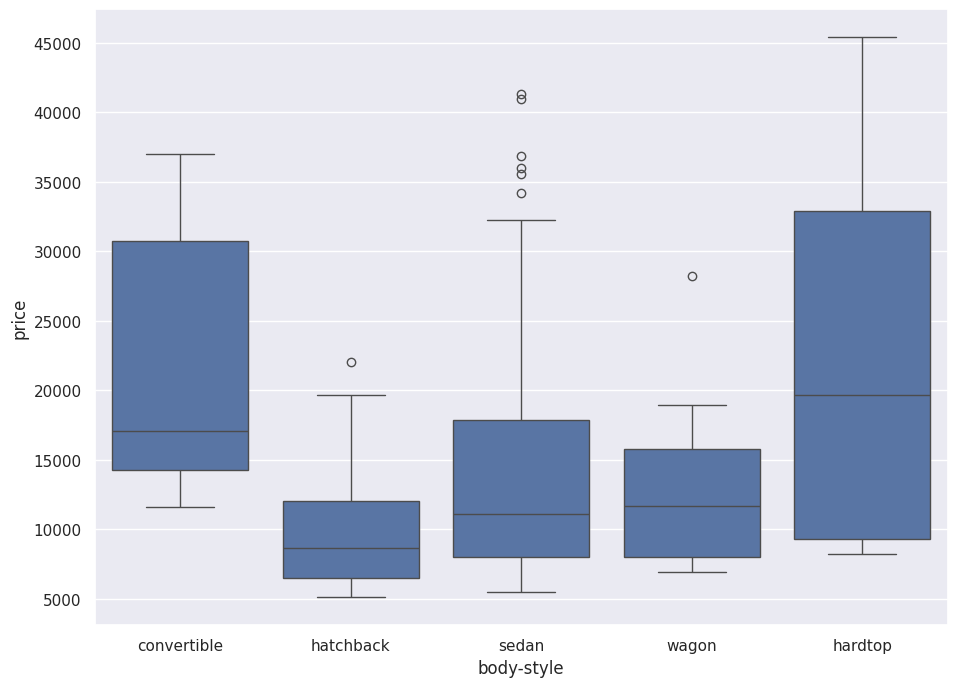

In [30]:
sns.boxplot(x = 'body-style', y = 'price', data = df)
plt.show()

Nous voyons que les distributions de prix entre les différentes catégories de body-style ont un
chevauchement important, et donc cette variable ne serait pas un bon prédicteur de prix.

*engine-location VS price*  
La variable engine-location représente l'emplacement (avant ou arrière) du moteur.

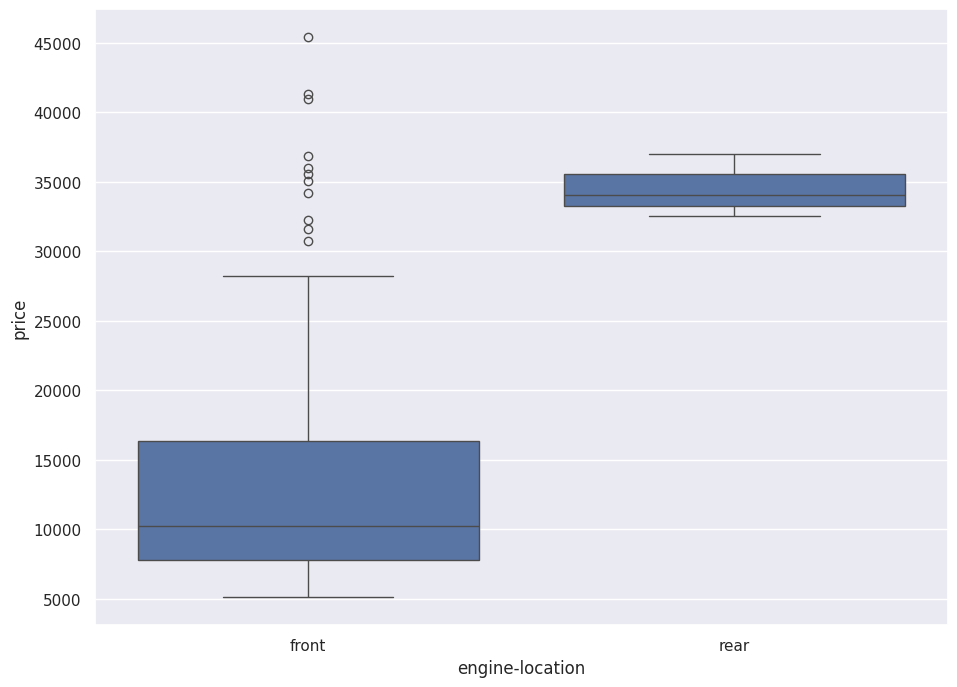

In [31]:
sns.boxplot(x = 'engine-location', y = 'price', data = df)
plt.show()

In [32]:
df['engine-location'].value_counts()

,count
engine-location,
front,198
rear,3


Les voitures avec des moteurs à l’arrière sont plus chères que les voitures avec des moteurs à
l’avant. Par ailleurs, il y a seulement trois voitures qui ont un moteur à l'arrière. Ce problème
de déséquilibre de classe disqualifie la variable engine-location comme variable prédicteur du
prix.

*drive-wheels VS price*  
La variable drive-wheels définit les roues motrices de la voiture.

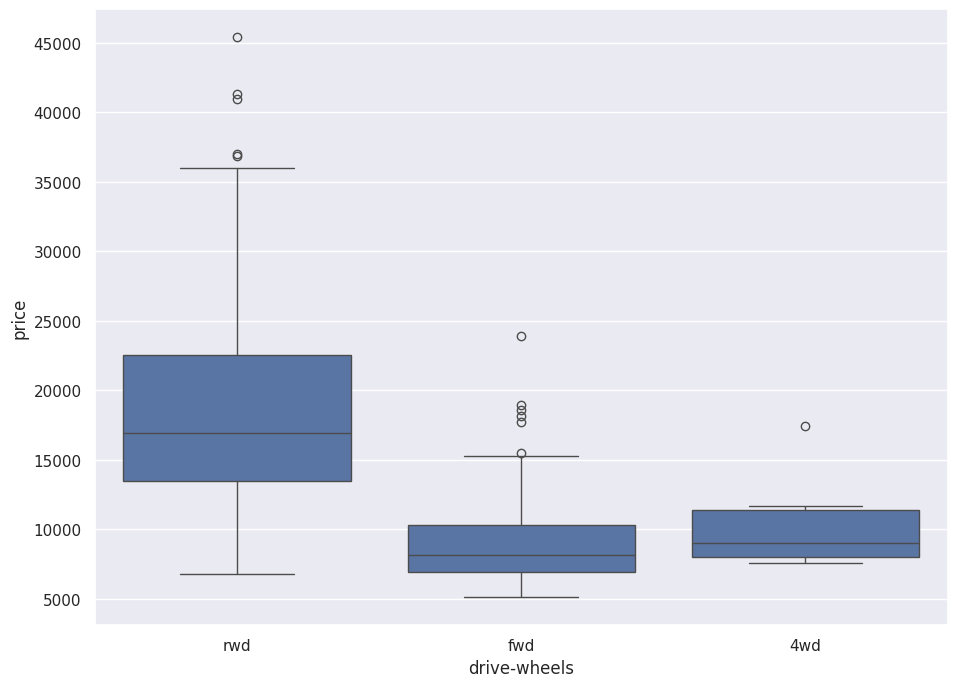

In [33]:
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)
plt.show()

On voit ici que la répartition des prix entre les différentes catégories de roues motrices est
différente. La variable drive-wheels pourrait potentiellement être une variable prédicteur de
prix d'une voiture.

Cette analyse exploratoire des données nous a permis d'avoir une meilleure idée des variables
qu'il est important de prendre en compte lors de la construction du modèle de prédiction du prix
d'une voiture. Il s'agit des variables suivantes :   
  Variables numériques continues : **'length', 'width', 'curb-weight', 'engine-size', 'horsepower',
'city-mpg', 'highway-mpg', 'wheel-base' et 'bore'.**  

Variable catégorielle : **'drive-wheels'.**

### MODELISATION DU PRIX D'UNE VOITURE  
* **CONSTRUCTION DU MODELE**  
Nous construirons un modèle de régression linéaire multiple pour prédire le prix de vente d'une
voiture en fonction de certaines de ses caractéristiques. Ces caractéristiques ont été déterminé
lors de l'Analyse exploratoire des données.


In [36]:
#Variables indépendantes
X = df[['wheelbase', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg','highway-mpg']]

#Variable dépendante
y = df['price']

#Création d'un modèle de régression linéaire
lm = LinearRegression()

#Entraînement du modèle
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

#Coefficients
lm.coef_


array([  111.78344803,   -72.26084531,   634.95267368,     3.11828375,
          79.05419995, -1026.27963187,    59.42633928,  -170.06836451,
         184.10851533])

In [37]:
#Ordonnée à l'origine
lm.intercept_

-49178.735733150366

* **EVALUATION DU MODELE**  

In [38]:
#Coefficient de détermination
lm.score(X,y)

0.8190670251946172

Avec ce modèle, nous avons un coefficient de détermination (R²) égal à environ 0,82. Nous
pouvons donc dire que le modèle capture bien les relations linaires dans les données. En effet,
plus R² est proche de 1, plus on a un bon modèle (R² varie entre 0 et 1).  

Pour évaluer la qualité d'ajustement du modèle aux valeurs réelles, nous allons examiner la
distribution des valeurs ajustées qui résultent du modèle et la comparer à la distribution des
valeurs réelles.  

Analysons la distribution des prix calculés par le modèle et celle des prix réels.

<ipython-input-39-85c87f966ffe>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="b", label="Prix réels")
<ipython-input-39-85c87f966ffe>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="r", label="Prix calculés" , ax=ax1)


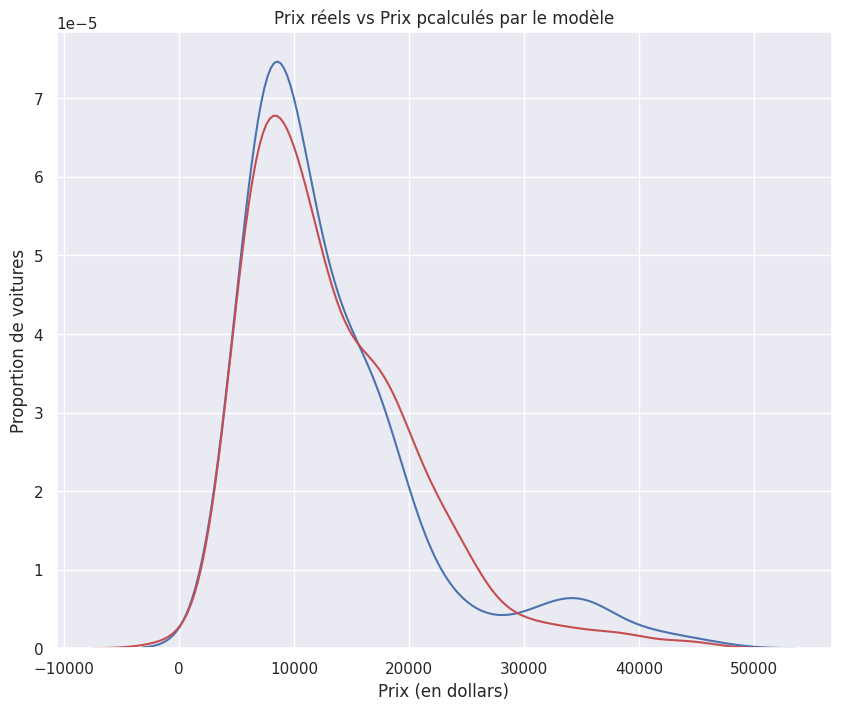

In [39]:
#Prix prédits à partir du modèle
Y_hat = lm.predict(X)
#Distributions des valeurs ajustées et des valeurs réelles
plt.figure(figsize=(10, 8))
ax1 = sns.distplot(y, hist=False, color="b", label="Prix réels")
sns.distplot(Y_hat, hist=False, color="r", label="Prix calculés" , ax=ax1)
plt.title('Prix réels vs Prix pcalculés par le modèle')
plt.xlabel('Prix (en dollars)')
plt.ylabel('Proportion de voitures')
plt.show()
plt.close()

La métrique d'évaluation par défaut de la performance d'un modèle de régression linéaire est le
coefficient de détermination. Le coefficient de détermination est égal à 0,82 c'est-à-dire que
82% de la variation de prix est expliquée par le modèle. Par ailleurs, on remarque que les deux
courbes sont pratiquement superposées ce qui veut dire que les prix calculés par le modèle sont
proches des prix réels. Globalement, nous pouvons donc dire que le modèle est de bonne qualité.
Néanmoins, selon le graphique ci-dessus il y a une zone que le modèle ne couvre pas ce qui
indique que nous pouvons essayer d’améliorer ce modèle.

### CONCLUSION  
Ce projet est une initiation à la Régression qui est une tâche de Machine Learning supervisé.
Dans le but de déterminer à quel prix 'juste' on peut vendre ou acheter une voiture, nous avons
effectué la présente étude. D'abord, nous avons collecté des données pertinentes et procéder à
leur nettoyage. Ensuite, ce fussent les phases de Nettoyage puis d'Analyse Exploratoire des
données. Au cours de cette dernière phase, nous avons pu déterminer les variables qui
influencent vraiment la valeur d’une voiture c’est-à-dire son prix. Enfin, nous avons construit un modèle de régression linéaire puis terminé par l'évaluation de ce modèle. Le modèle a donné
un bon résultat sur les données ayant servi à son entraînement. Mais le fait d’évaluer un modèle
seulement sur les données d’entraînement ne nous dit pas s’il est capable de bien se comporter
avec des nouvelles données. Or le but ultime de la création d’un modèle est de pouvoir l’utiliser
pour effectuer des prédictions avec de nouvelles données. Un modèle peut avoir un très bon
score d’entraînement et avoir une mauvaise performance sur de nouvelles données : problème
de surapprentissage (overfiting). Dans les projets suivants, nous verrons plusieurs techniques
permettant de vérifier la capacité d’un modèle de Machine Learning à se généraliser et aussi
des techniques d’amélioration de sa qualité.